# Electric Vehicle Sales in India – Data Cleaning & EDA

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Step 2: Load the dataset
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [3]:
# Step 3: General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [4]:
# Step 4: Check for missing values
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [5]:
# Step 5: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'EV_Sales_Quantity'], inplace=True)

In [6]:
# Step 6: Check and remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
# Step 7: Final check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


# Step 2: Exploratory Data Analysis (EDA)

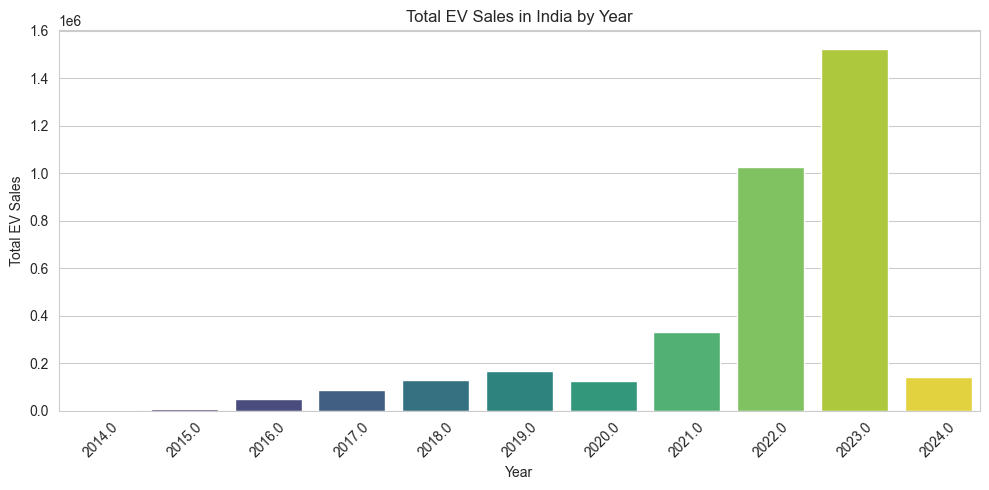

In [14]:
# 2.1 – EV Sales Over the Years
yearly_sales = df.groupby(df['Year'])['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Year',
    y='EV_Sales_Quantity',
    data=yearly_sales,
    hue='Year',
    palette='viridis',
    legend=False
)
plt.title('Total EV Sales in India by Year')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

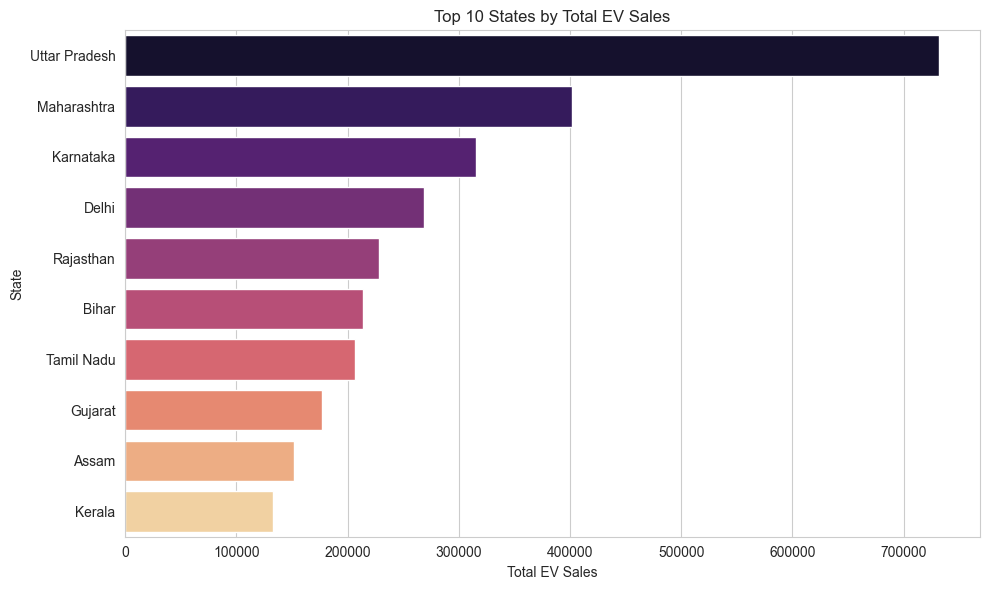

In [13]:
# 2.2 – EV Sales by State
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=state_sales.values,
    y=state_sales.index,
    hue=state_sales.index,
    palette='magma',
    legend=False
)
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

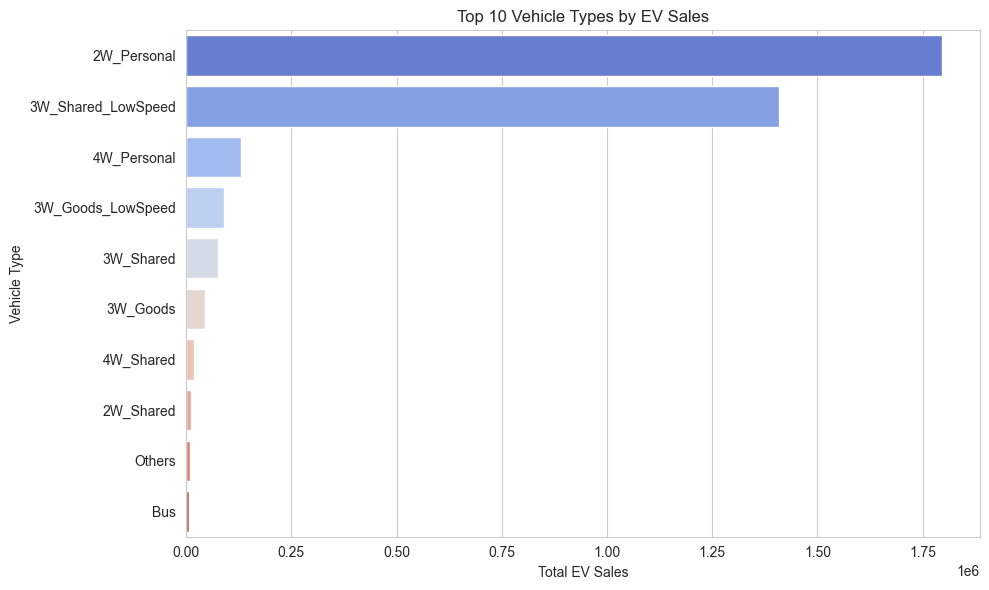

In [12]:
# 2.3 – EV Sales by Vehicle Type
vehicle_type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=vehicle_type_sales.values,
    y=vehicle_type_sales.index,
    hue=vehicle_type_sales.index,
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 Vehicle Types by EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('Vehicle Type')
plt.tight_layout()
plt.show()

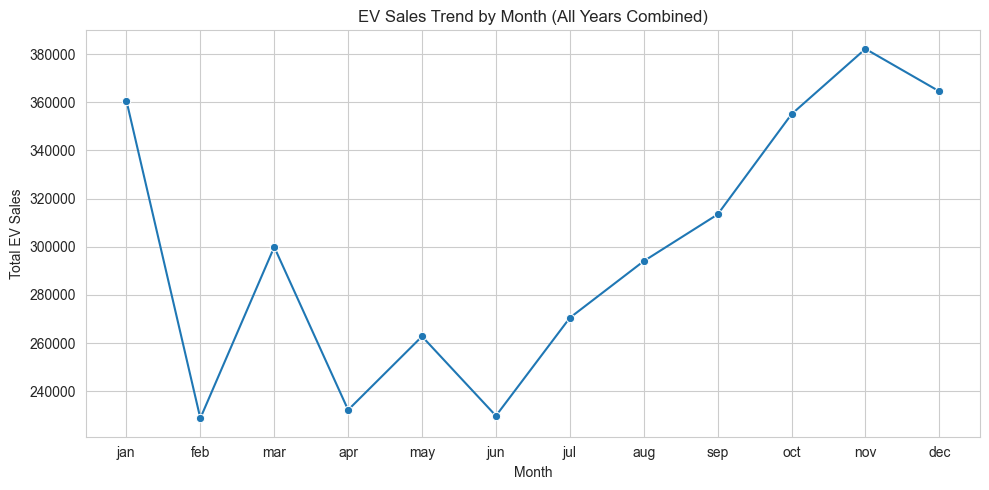

In [11]:
# 2.4 – Monthly Sales Trend
monthly_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum()
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_sales = monthly_sales.reindex(months_order)
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('EV Sales Trend by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion

This analysis provides valuable insights into the trends and patterns of electric vehicle sales in India. The findings can help stakeholders make informed, data-driven decisions to further accelerate the adoption and growth of electric vehicles across the country.